
# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>

### Семинар 8. Линейная регрессия (продолжение)
#### Несколько примеров линейной регрессии
#### Фиттинг поверхности в пространстве

Пример линейной регрессии \- полиномиальный фитинг двумерных данных


Задача следующая, имеются данные $\vec{Y} ,\vec{X_1 } ,\vec{X_2 }$  \- вектор\-столбцы наблюдений некоторых параметров


В первом варианте предполагается, что $\vec{Y}$ зависит от $\vec{X_1 }$  и $\vec{X_2 }$  линейно, то есть каждую координату вектора $\vec{Y}$  можно выразить в виде линейной комбинации соотвествующих координат векторов $\vec{X_1 }$  и $\vec{X_2 }$  :


 $Y_i =\beta_1 +\beta_2 X_{1i} +\beta_3 X_{2i}$ (i \- индекс строки)


$$\vec{Y} =[\vec{1} ,\vec{X_1 } ,\vec{X_2 } ][\begin{array}{c} \beta_1 \newline \beta_2 \newline \beta_3  \end{array}]$$

Во втором варианте предполагается, что зависимость квадратичная:


$$Y_i =w_1 +w_2 X_{1i} +w_3 X_{2i} +w_4 X_{1i}^2 +w_5 X_{2i}^2$$

$$\vec{Y} =[\vec{1} ,\vec{X_1 } ,\vec{X_2 } ,{\vec{X_1 } }^2 ,{\vec{X_2 } }^2 ][\begin{array}{c} w_1 \newline w_2 \newline w_3 \newline w_4 \newline w_5  \end{array}]$$

Данные взяты из книжки:


In [1]:
% данные из "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
% пример из книжки K.P.Murphy "Probabilistic machine learning. An introduction"
data = load(fullfile(get_folder(),"DataSurfFit.mat"))

data = struct with fields:
    y: [53x1 double]
    X: [53x2 double]


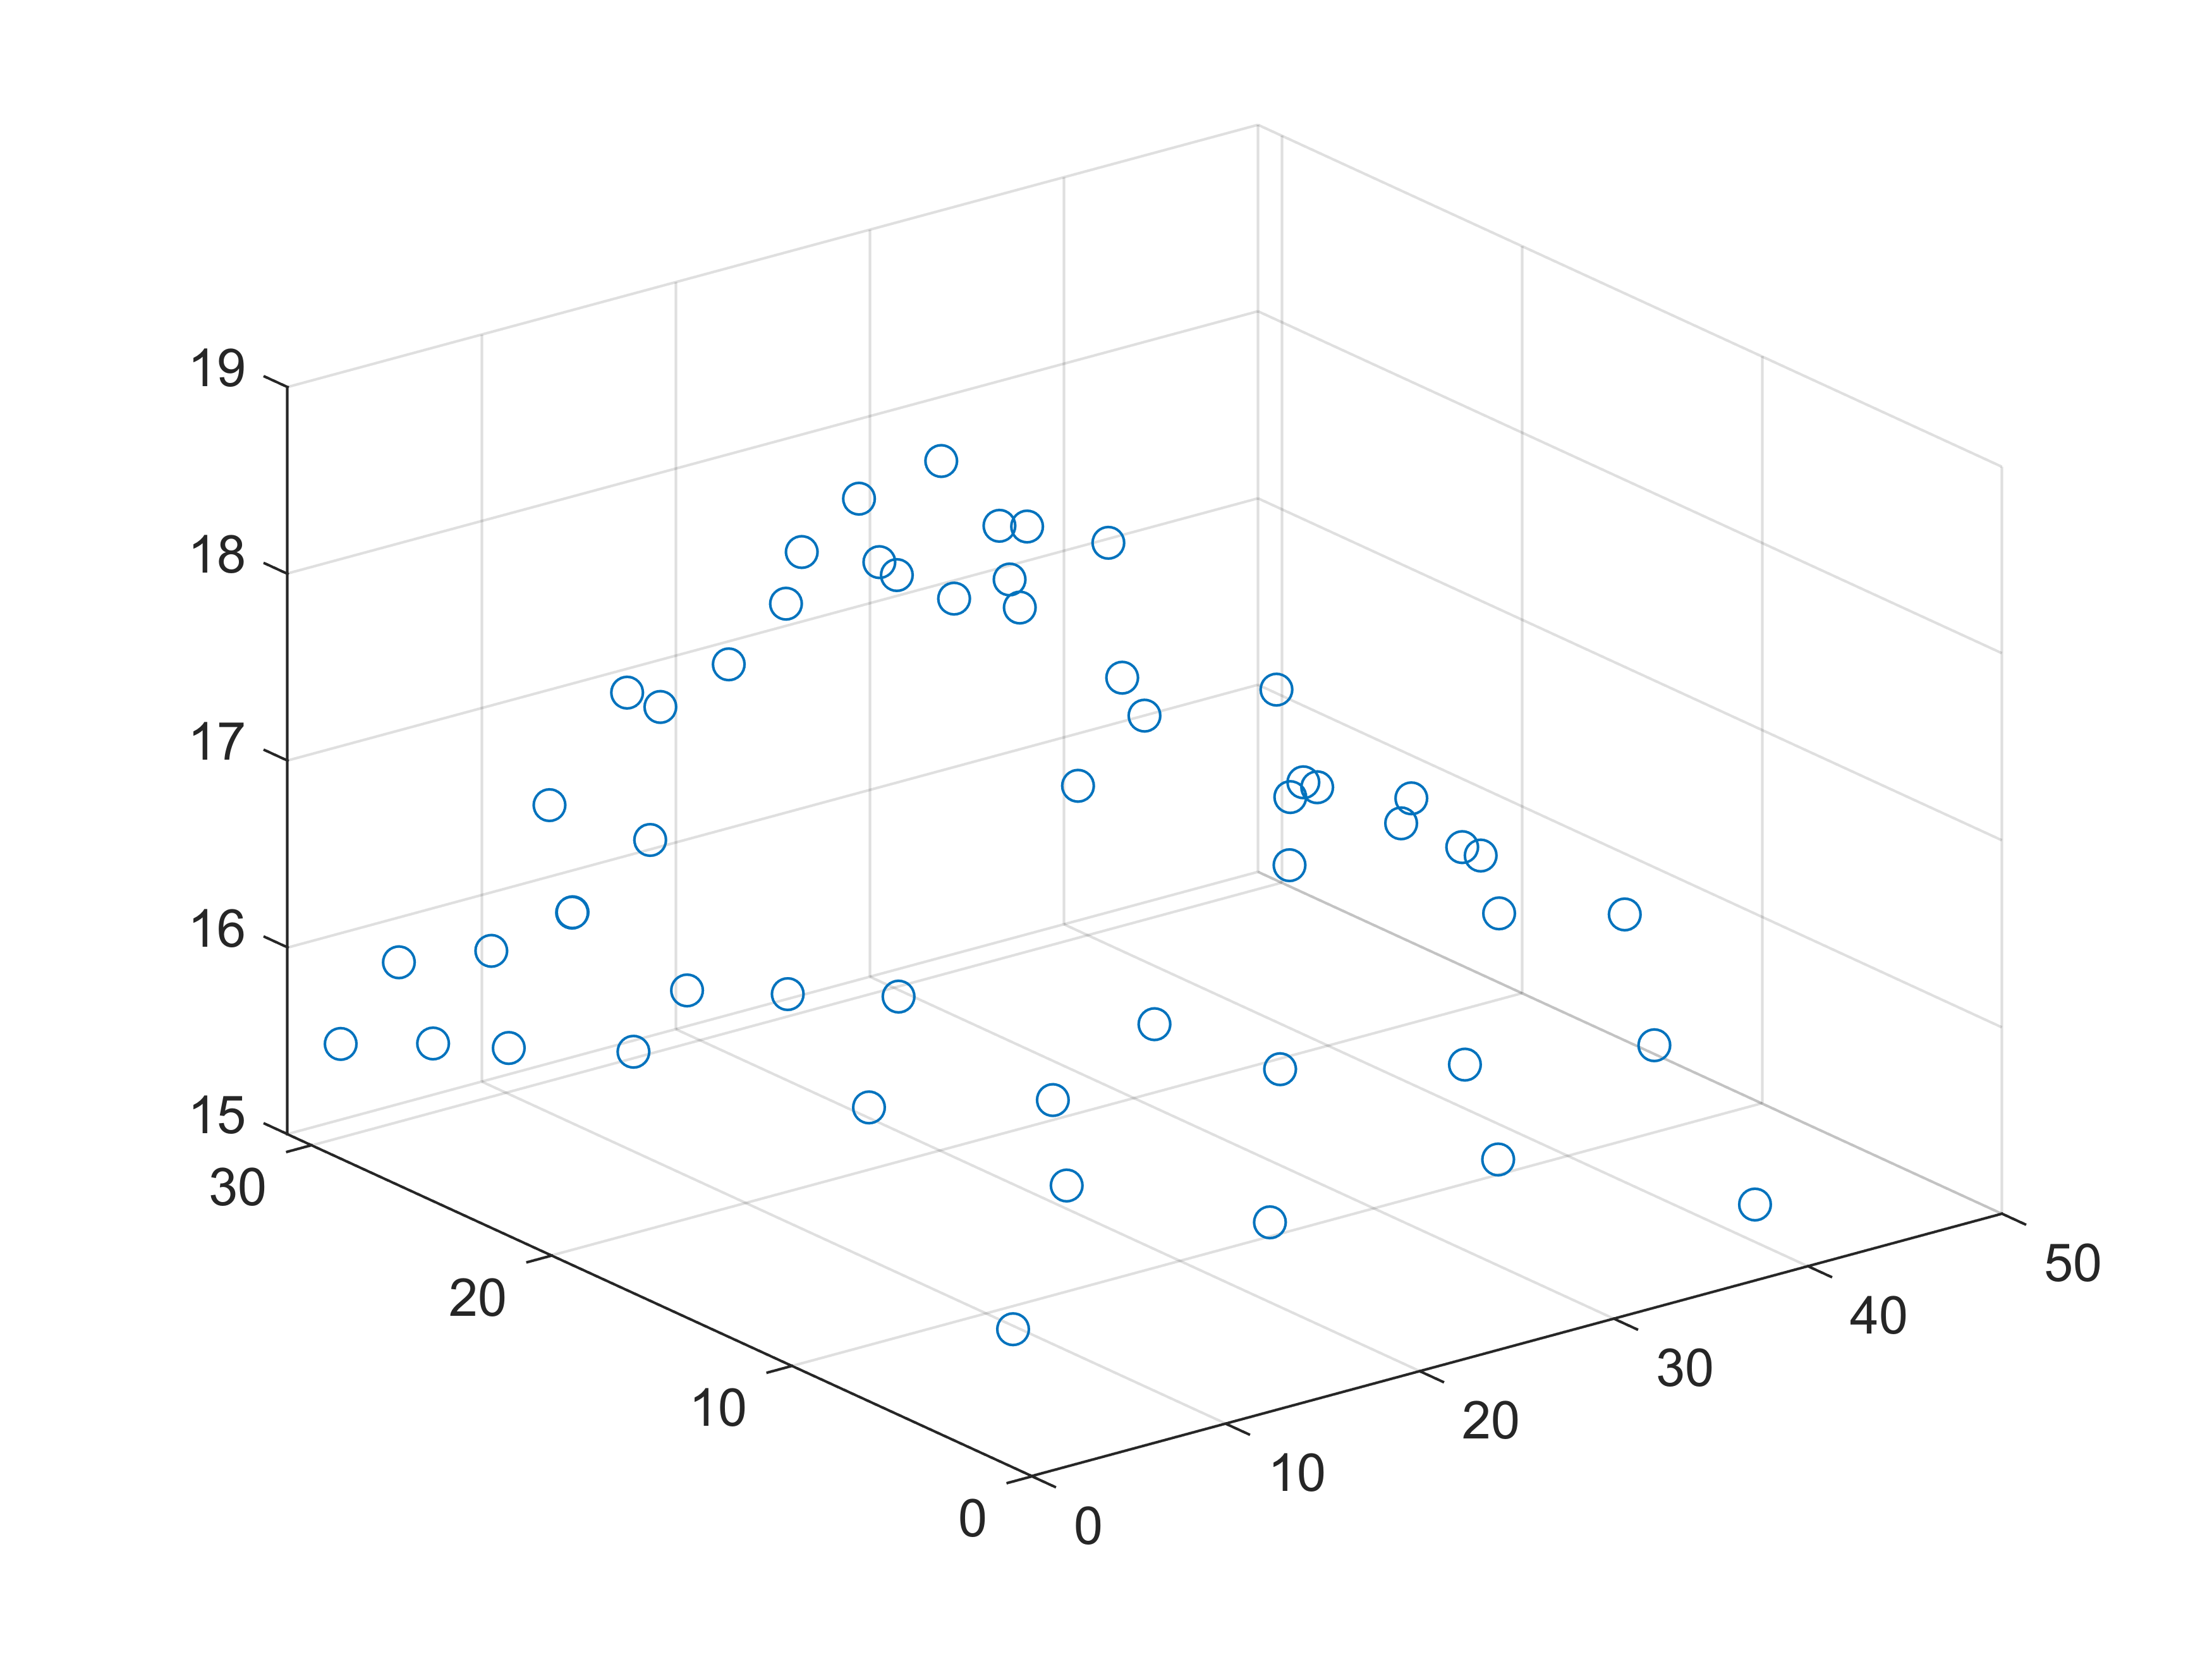

In [ ]:
Y = data.y;
X1 = data.X(:,1);
X2 = data.X(:,2);
N = numel(X1);
scatter3(X1,X2,Y)


Решаем задачу линейно регрессии для двух вариантов зависимости


In [3]:
I1 = ones([N 1]);
V1 = [I1,data.X];% матрица полинома первой степени (три колонки)
W1 = lsqminnorm(V1,Y) % аппроксимируем линейной зависимостью

W1 = 3x1    
   16.4141
    0.0137
    0.0037

In [4]:
norm1 = norm(Y - V1*W1)

norm1 = 5.8802

In [5]:
% W1 = V1\Y ;
V2 = [I1,data.X,data.X.^2]; % матрица для полинома второй степени (пять колонок)
W2 = lsqminnorm(V2,Y) % аппроксимируем квадратичной зависимостью

W2 = 5x1    
   14.4583
    0.1972
    0.1736
   -0.0045
   -0.0052

In [6]:
norm2 = norm(Y - V2*W2)

norm2 = 3.2956

In [7]:
% W2 = V2\Y ; % аппроксимируем квадратичной зависимостью
% Функция lsqminnorm решает задачу Ax=b  в смысле наименьших квадратов
% Отличие функции x = lsqminnorm(A,b) от x = A\b в том, что она минимизирует не
% только норму квадратичного отклонения, но и (это актуально если матрица A является
% сингулярной) норму самого вектора

In [8]:
% теперь построим поверхность по результатам интерполяции
M = 10

M = 10


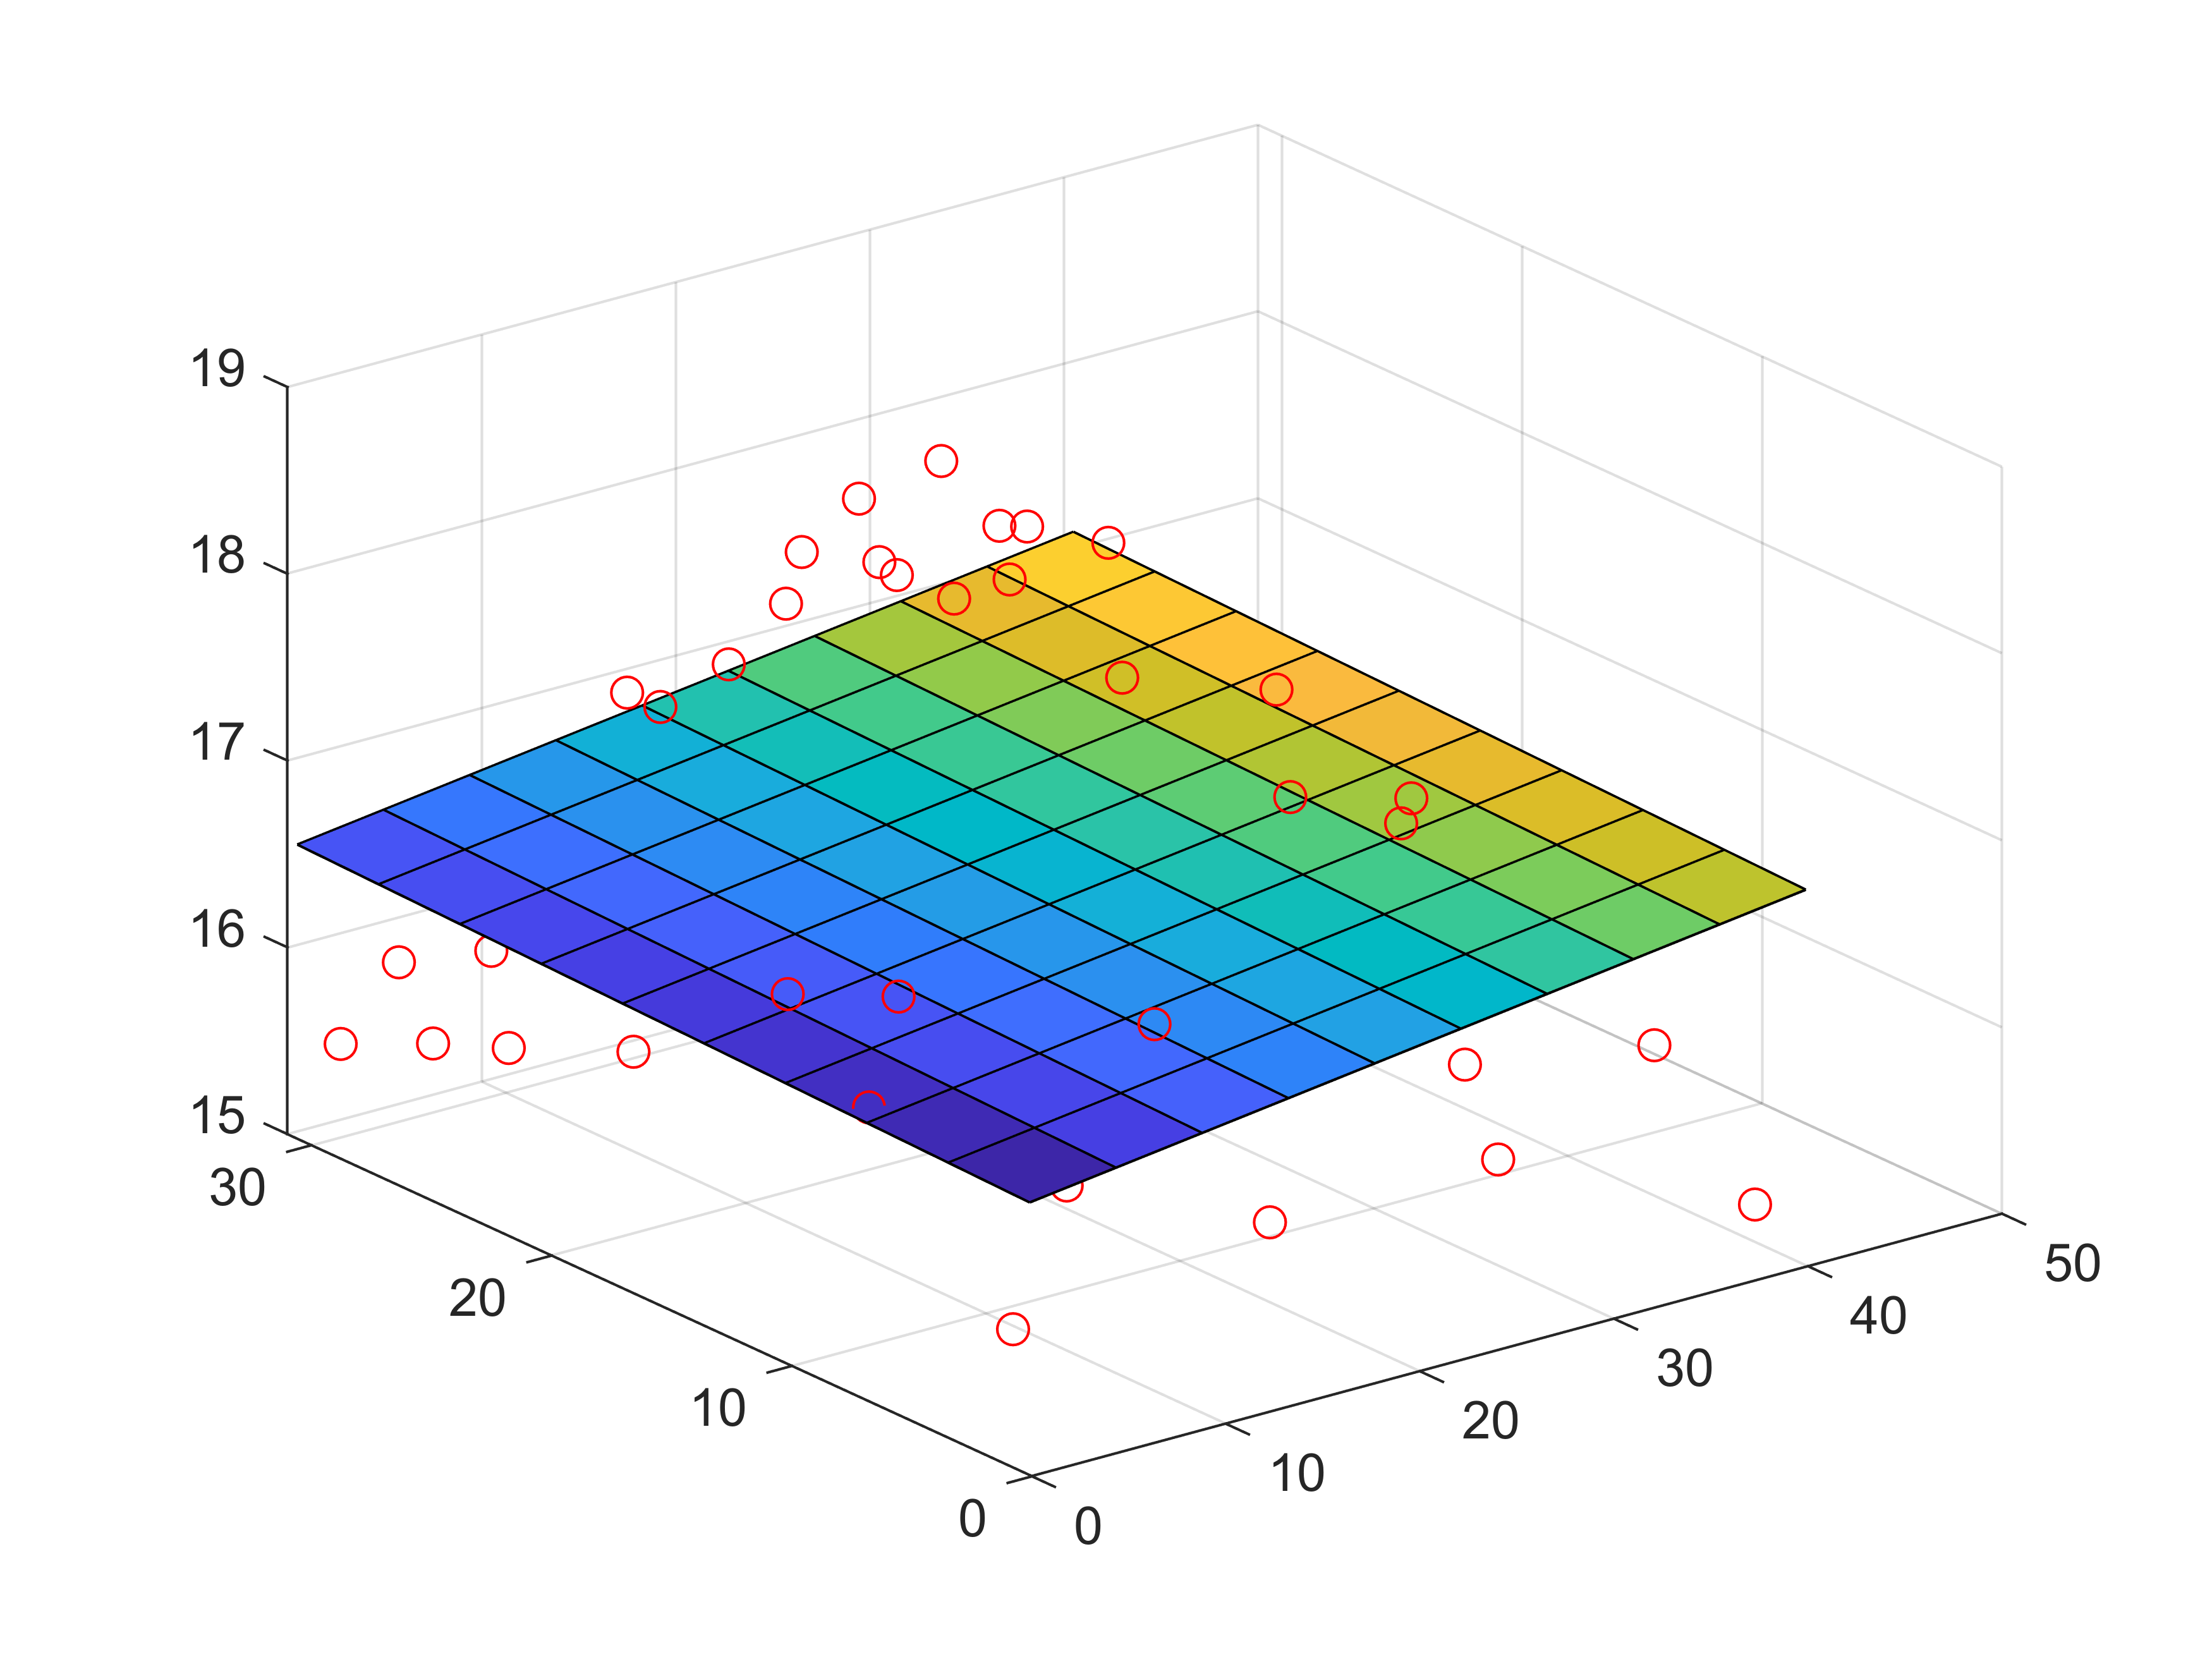

In [9]:

xrange = linspace(min(X1), max(X1), M);
yrange = linspace(min(X1), max(X2), M);
% оборачиваем расчет полинома в указатель на функцию (функция будет
% вызываться скалярно в цикле)
z_fun_linear =@(x,y,w) w(1)+ x*w(2) + y*w(3);
z_fun_square = @(x,y,w) z_fun_linear(x,y,w) +w(4)*x^2 + w(5)*y^2;
[Xgrid,Ygrid] = meshgrid(xrange,yrange);
Z1 = zeros(M);
Z2 = zeros(M);
for ii = 1:M
    for jj = 1:M
        x = Xgrid(ii,jj);y = Ygrid(ii,jj);
        Z1(ii,jj) = z_fun_linear(x,y,W1);
        Z2(ii,jj) = z_fun_square(x,y,W2);
    end
end
ax = get_next_ax();
surf(ax,Xgrid,Ygrid,Z1)
hold(ax,"on")
scatter3(ax,X1,X2,Y,"or")
hold(ax,"off")


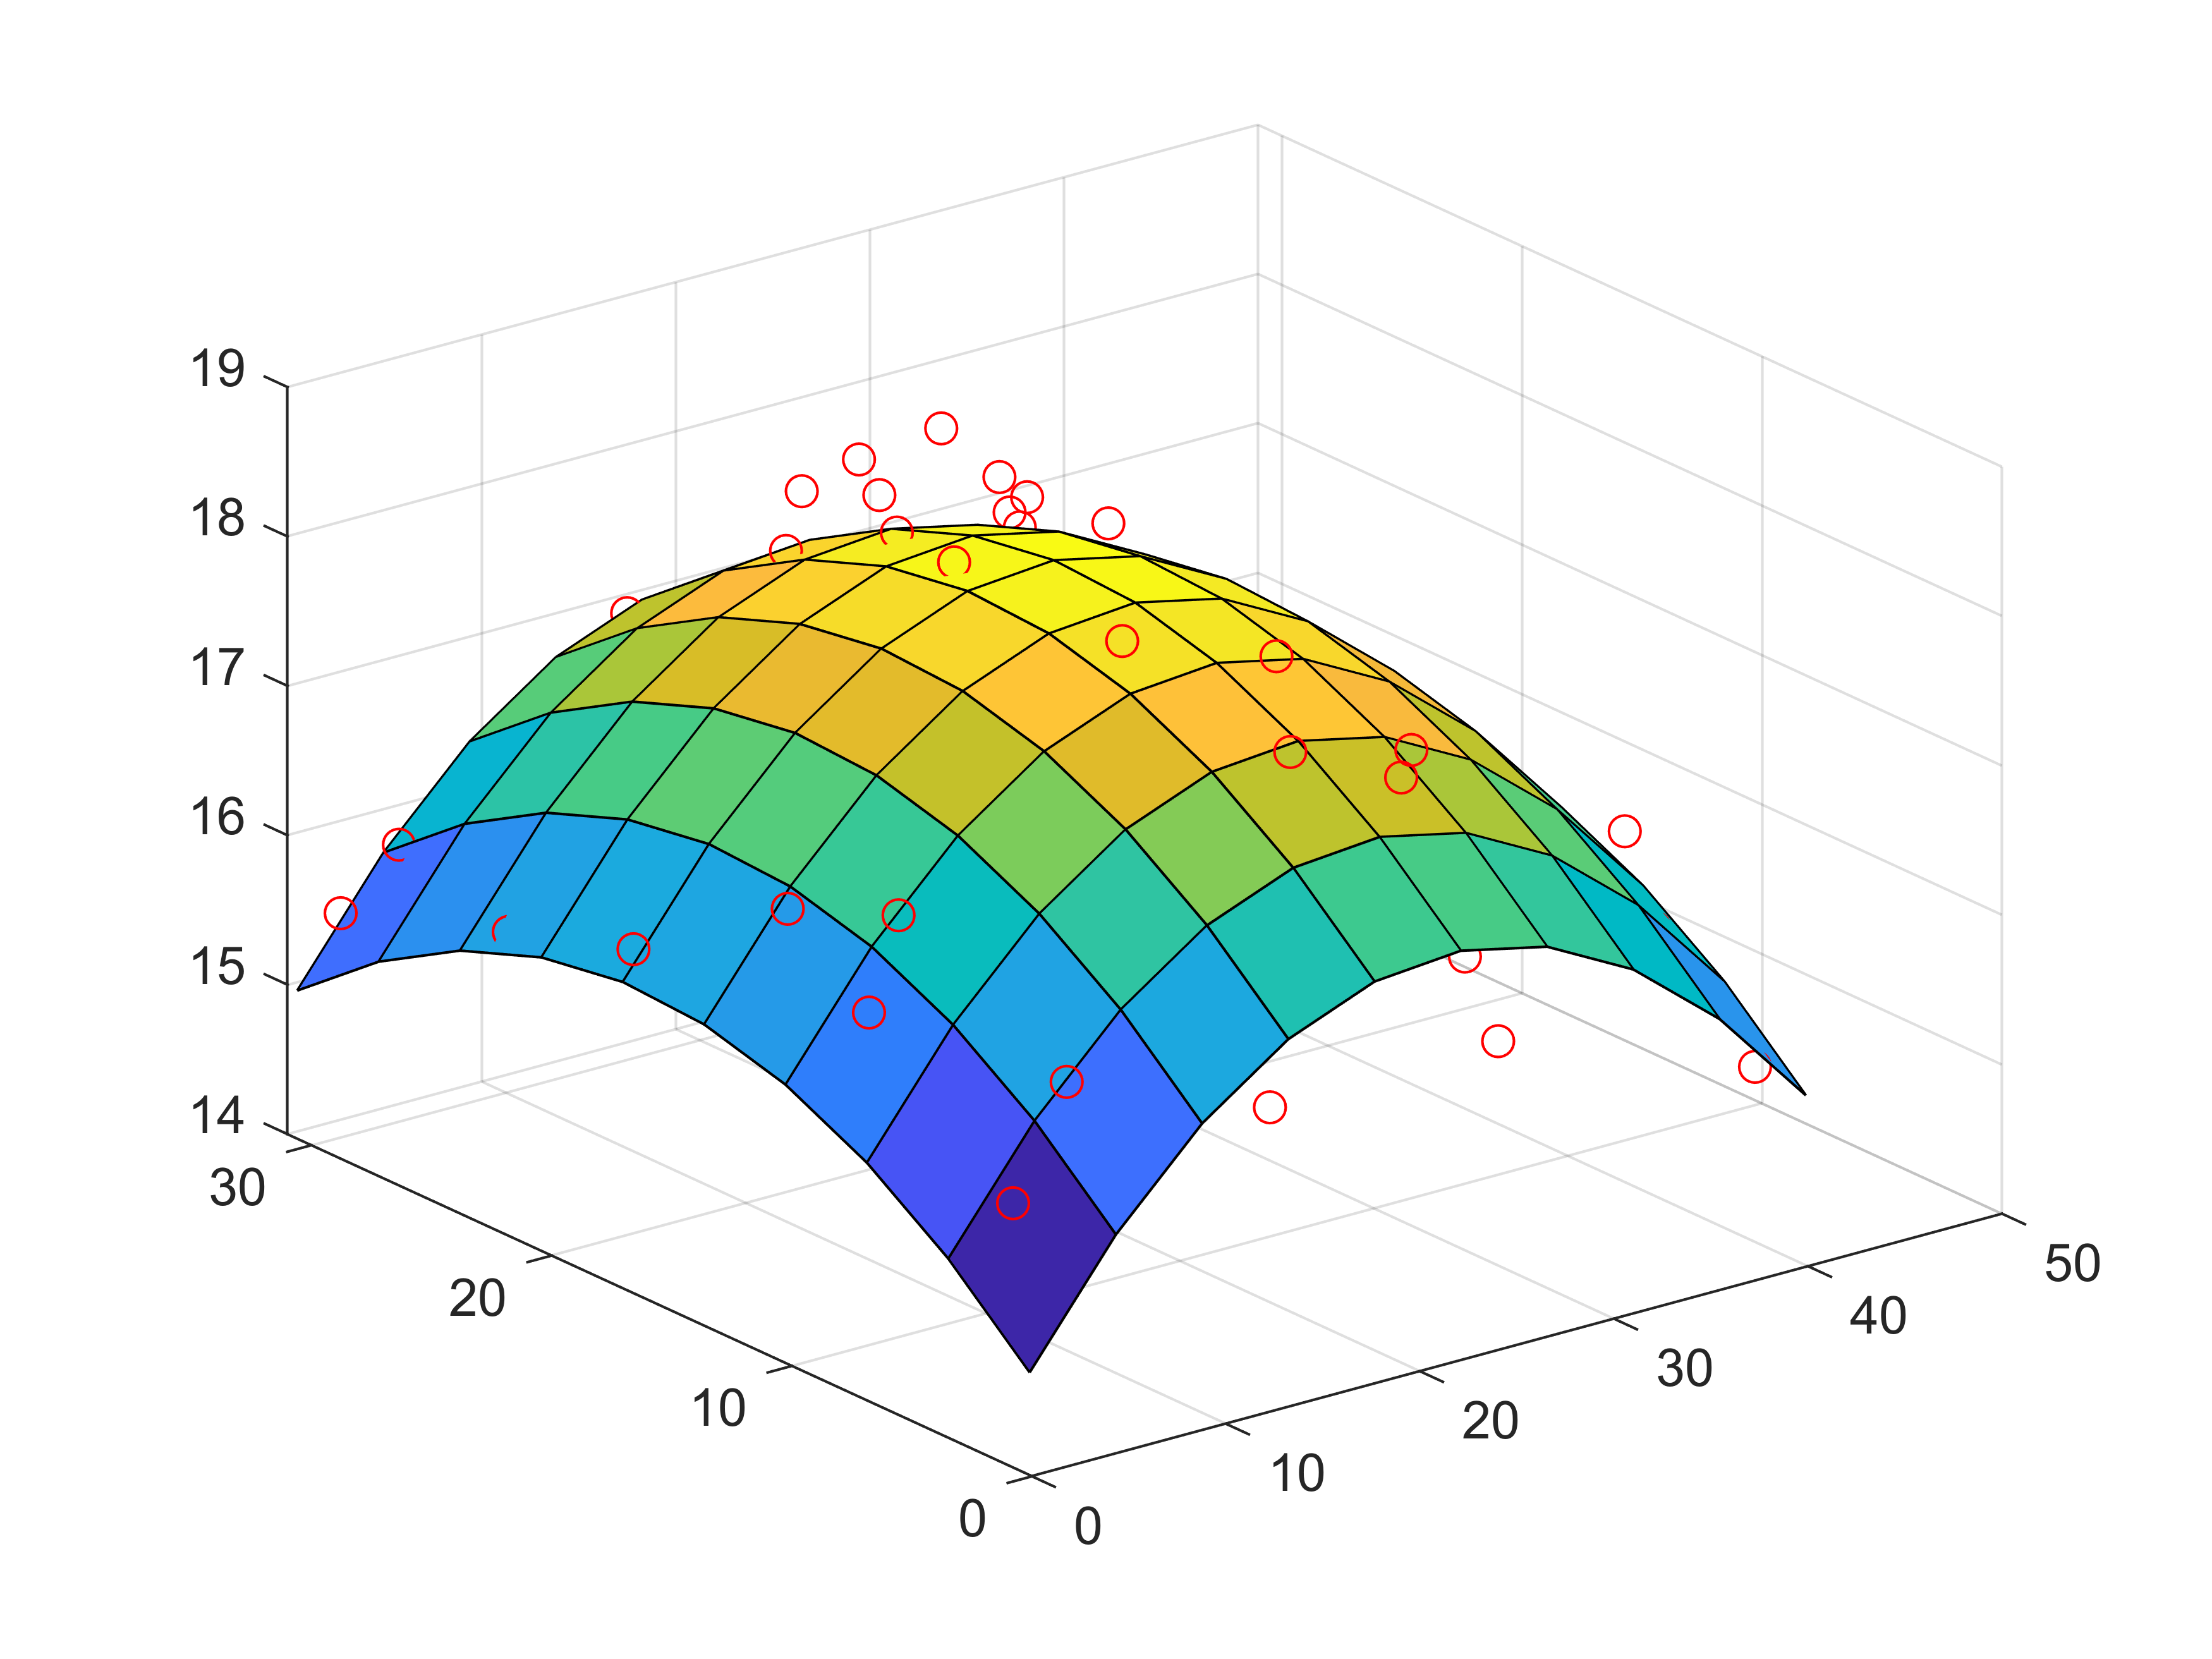

In [10]:

ax = get_next_ax();
surf(Xgrid,Ygrid,Z2)
hold(ax,"on")
scatter3(ax,X1,X2,Y,"or")
hold(ax,"off")

In [11]:
% Двойной вложенный цикл это постыдно, упражнение:
% сгенерить данные для поверхности без использования циклов

#### Пример 2. Линейная регрессия нелинейной задачи.

Иногда нелинейную задачу можно свести к линейной путем некоторого нелинейного пребразования, для примера рассмотрим следующую задачу:


Есть данные $\vec{y}$ и $\vec{x}$ , предполагается, что $y(x)=\alpha_1 x^{\alpha_2 } \exp (-\frac{\alpha_3 }{x})$ , нужно найти параметры $\alpha_1 ,\alpha_2 ,\alpha_3$


Данная задача сводится к задаче линейной регрессии (несмотря на то, что в изначальной постановке параметры входят нелинейно, если прологарифмировать обе части, то:


$$ln(y)=ln(\alpha_1 )+\alpha_2 *ln(x)-\alpha_3 \frac{1}{x}$$

Если ввести новые переменные, то получи мзадачу линейной регрессии :


 $\vec{Y} =ln(\vec{y} )$  $\vec{X_1 } =\ln (\vec{x} )$  и $\vec{X_2 } =1/\vec{x}$


 $\beta_1 =\ln (\alpha_1 )$ , $\beta_2 =\alpha_2$ , $\beta_3 =-\alpha_3$


$$\vec{Y} =[\vec{1} ,\vec{X_1 } ,\vec{X_2 } ][\begin{array}{c} \beta_1 \newline \beta_2 \newline \beta_3  \end{array}]$$

In [12]:
clearvars
e = 0.2;
N = 62;
x = linspace(0.3,6,N)';
a = [20 -2 2.2];
y = a(1)*(x.^a(2)).*exp(-a(3)./x) + e*randn(N,1);
X1 = log(x);
X2 = 1./x;
I = ones([N,1]);
X = [I,X1,X2];
Y = log(y);
b = lsqminnorm(X,Y);
a_fitted = [exp(b(1)) b(2) -b(3)]

a_fitted = 1x3    
   19.5557   -2.0433    2.1180

In [13]:
a_real=a

a_real = 1x3    
   20.0000   -2.0000    2.2000


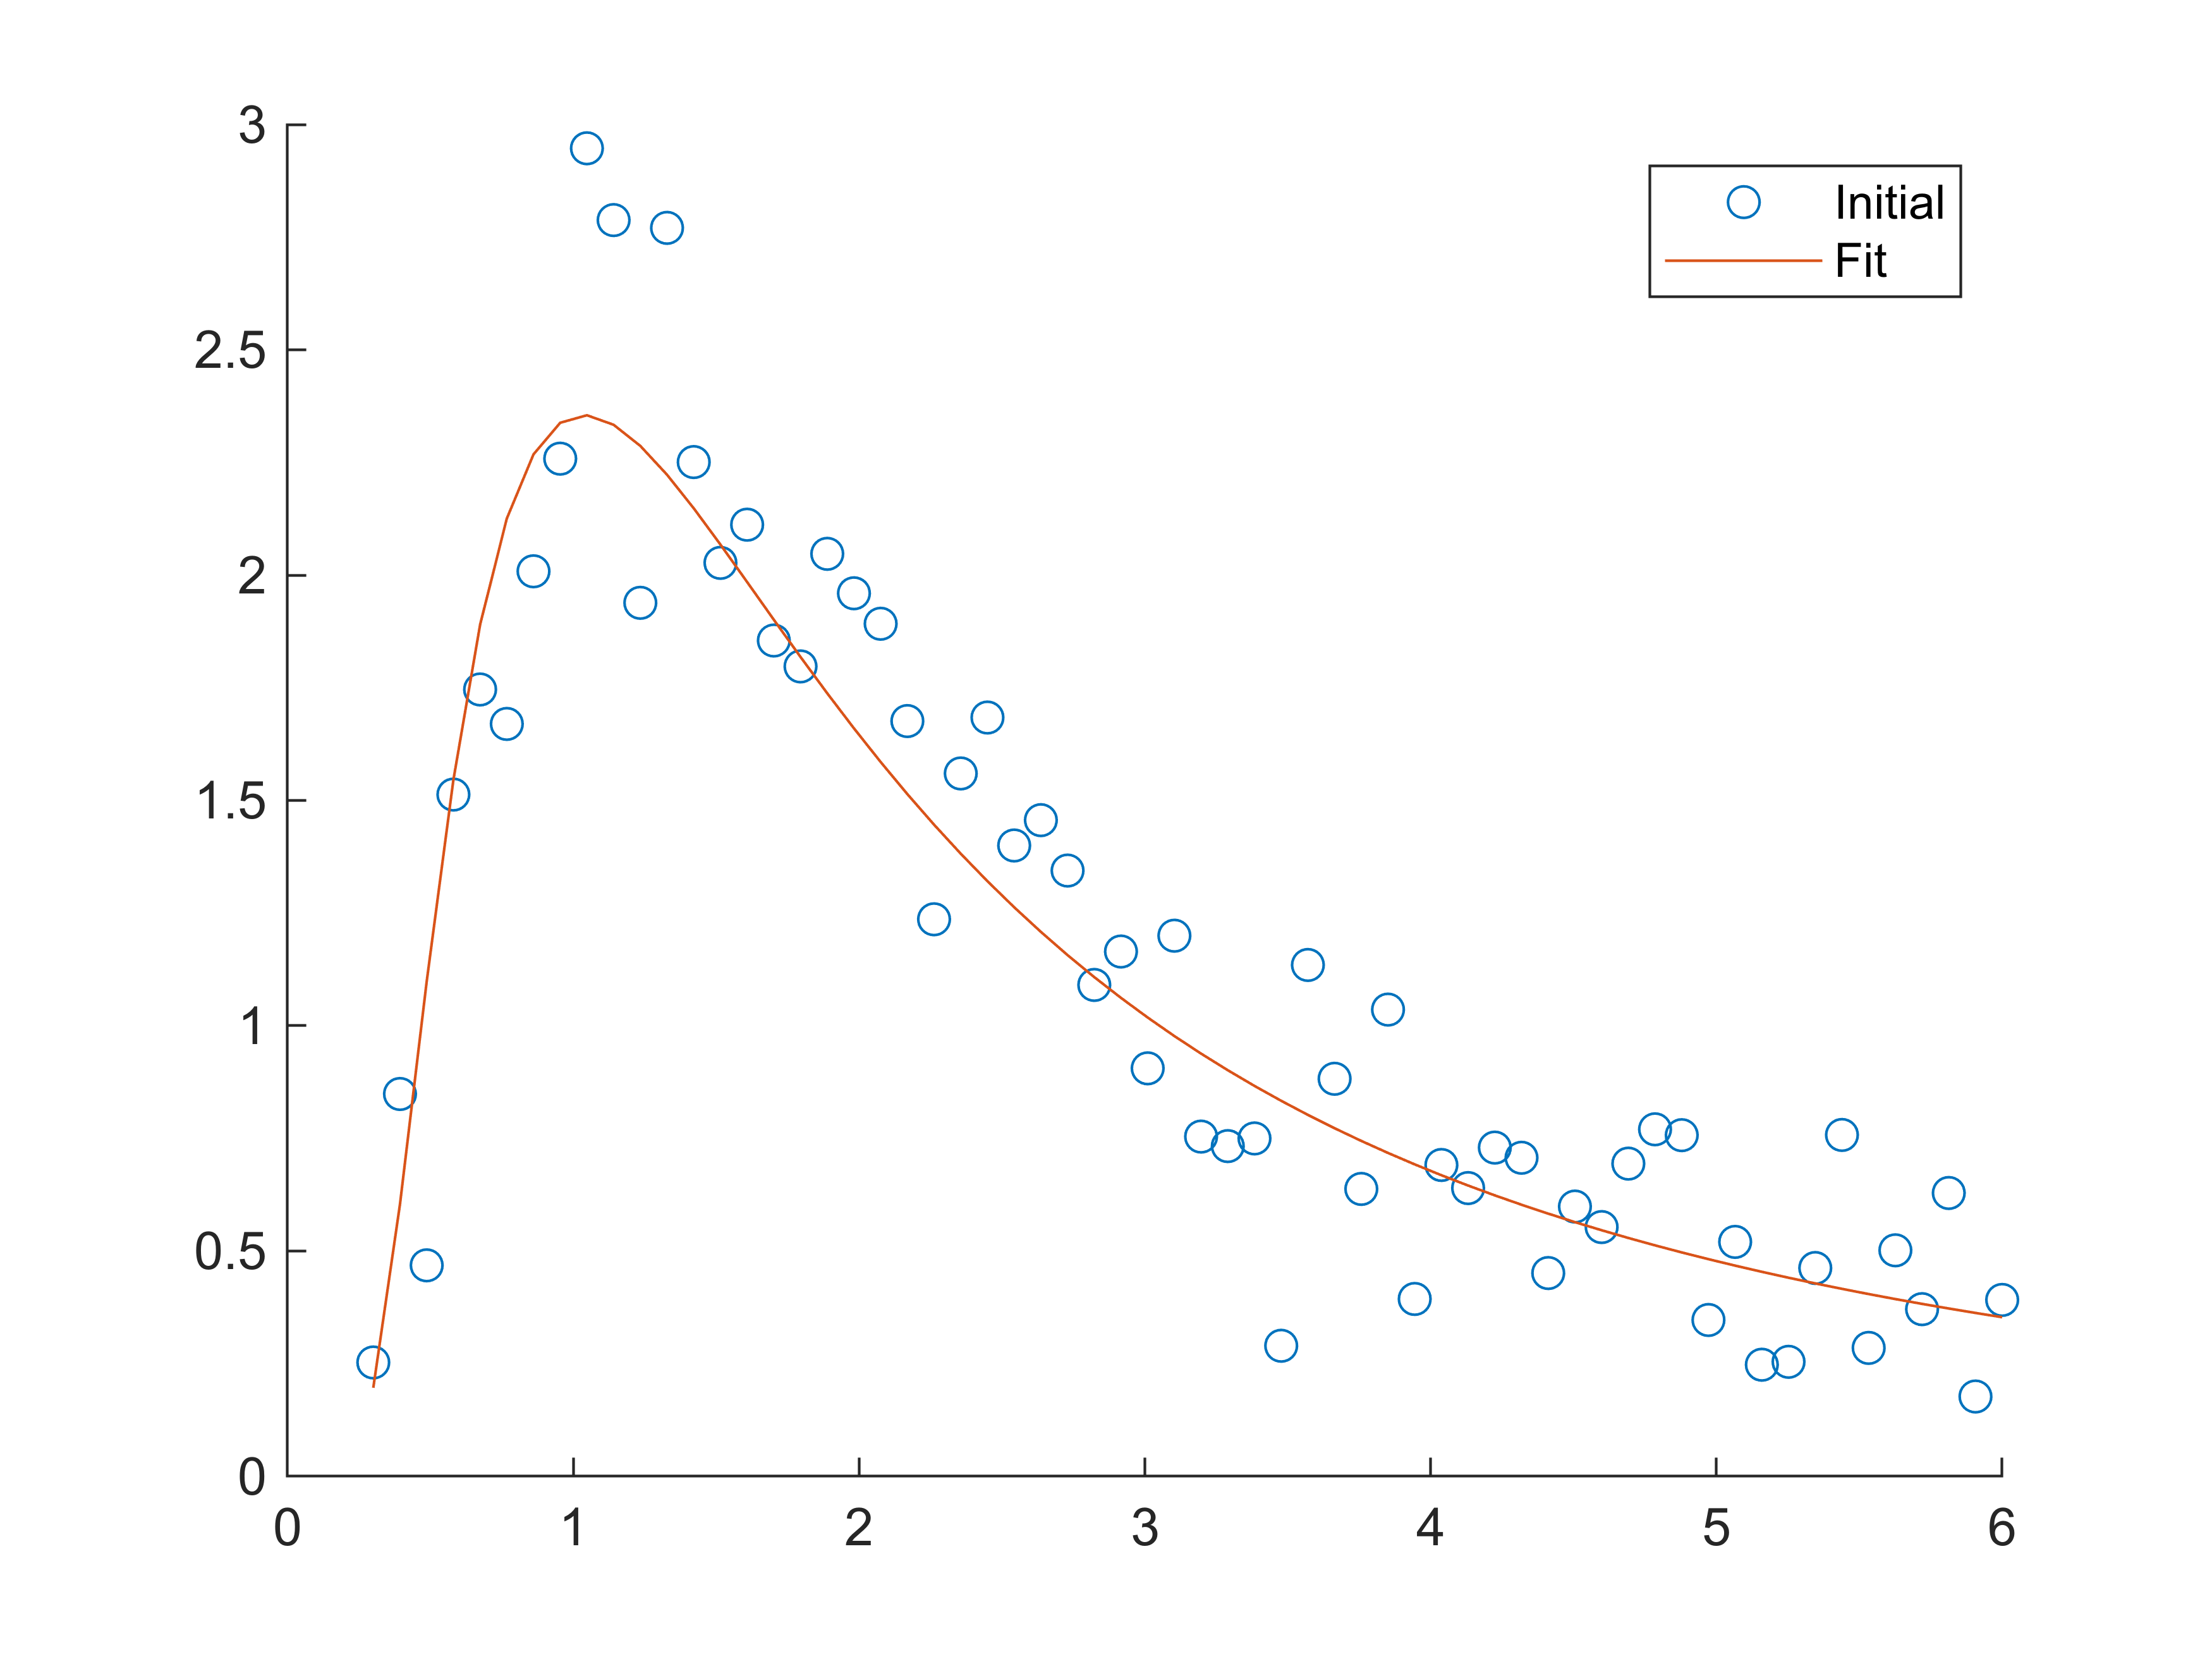

In [14]:
ax= get_next_ax();
scatter(ax,x,y);hold(ax,"on")
plot(ax,x,exp(X*b));hold(ax,"off");legend(ax,["Initial" "Fit"])


Вопрос что при всех этих нелинейных преобразованиях происходит с ошибкой....

### Погрешность линейной регрессии

**Введение. Понятия из статистики. Описательная статистика**


У нас есть случаная переменная, которая может принимать некоторый (дискретный) набор возможных значений:


$$\nu \sim \nu_1 \ldots\nu_N$$

Вероятность переменной иметь некоторое определенноей значение из этого дискретного набора характеризуется набором вероятностей:


 $P\sim p_1 \ldotsp_N$ , $\Sigma_i p_i =1$


Для некоторой случайной переменной, которая берется из некоторого распределения $P$ , математическое ожидание будет:


 $\hat{\nu} =\mathbb{E}[\nu \sim P]=\Sigma_i p_i \nu_i$  \- i \- индексы возможных исходов! (их всего N штук)


Среднее значение результатов набора из $M$ испытаний:


 $\mu_{\nu } =\frac{\Sigma_{j=1}^M \nu_j }{M}$ \- применяется для экспериментальной оценки мат. ожидания по M испытаниям


(j \- перебирает испытания, испытаний было M штук)


Разброс некоторой переменной характеризуется вариацией:


 $\mathbb{V}[\nu ]=\mathbb{E}[(\nu -\hat{\nu} )^2 ]=\Sigma_i p_i (\nu_i -\hat{\nu} )^2 =\mathbb{E}[(\nu^2 ]-(\mathbb{E}[\nu ])^2$ ,


Для экспериментальной оценки вариации по  выборке из $M$ испытаний:


$$S_{\nu \nu } =\frac{\Sigma_{j=1}^M (\nu_j -\hat{\nu} )^2 }{M-1}$$

 $std(x)=\sqrt{S_{\nu \nu } }$ \- cтандартное отклонение


Ковариация двух случаных переменных:


 $Cov(\nu ,\eta )=\mathbb{E}[(\nu -\mathbb{E}[\nu ])(\eta -\mathbb{E}[\eta ])]=\Sigma_{ij} p_{ij} (\nu_i -n)(\eta_i -m)$ ,


 $Cov(\nu ,\nu )=\mathbb{V}(\nu )$ ,


In [15]:
clearvars
M = 100;% число испытаний
N = 9; % число цифр (число возможных исходов)
possible_values = transpose(1:1:N);% сами цифры все возможные значения
a = randi(N,M,1); % случайно выбирает значения в диапазоне от 1 до N, M раз
histogram(get_next_ax(),a,[1.5;possible_values(2:end) + diff(possible_values)/2])

In [16]:
tb = table();
tb.Average = mean(a); % считаем среднее значение (оценка математического ожидания)
p_i = 1/N; % вероятность выбрать конкретную цифру
p = p_i*ones(N,1);% вектор вероятностей для всех цифр
tb.Expectation = p'*possible_values;
tb.STD2 = std(a)^2;
tb.Variation = p'*((possible_values-tb.Expectation).^2);
tb


Коэффициент корреляции двух случайных величин:


$$Cor(\eta ,\nu )=\frac{Cov(\eta ,\nu )}{\sqrt{\mathbb{V}(\eta )}\sqrt{\mathbb{V}(\nu )}}$$

Если у нас есть <u>вектор\-столбец измерений</u> некоторой случайной величины x, то есть, каждая из координат этого вектора \- образцы (сэмплы, розыгрыши) случайной величины x, экспериментальной оценкой вариации будет:


 $S_{xx} =(\vec{X} -\mu_x \vec{I} )^T (\vec{X} -\mu_x \vec{I} )/(N-1)$ , $\vec{I}$ \- вектор состоящий из единиц,


 $\mu_x =\frac{\sum_{i=1}^N (x_i )}{N}=\frac{\vec{I} {\vec{X} }^T }{N}$ \- экспериментальная оценка математического ожидания.


Ковариации линейно комбинации двух случайных величин:


$$Cov(a\nu +b\eta )=a^2 Cov(\nu ,\nu )+2abCov(\nu ,\eta )+b^2 Cov(\eta ,\eta )=a^2 \mathbb{V}(\nu )+2abCov(\nu ,\eta )+b^2 \mathbb{V}(\eta )$$

Если у нас есть вектор <u>случайных</u> величин (то есть, вектор, координаты которого случайные величины, каждая получена из своего распределения, каждая имеет свое среднее и свою вариацию :


$$\vec{\beta} =[\begin{array}{ccccc} \beta_1 , & \ldots & \beta_i , & \ldots & \beta_N  \end{array}]^T$$

Среднее значение этого вектора \- тоже вектор, каждая из координат которого  \- это среднее значение соотвествующей случайной величины:


$$\mathbb{E}[\vec{\beta} ]=[\mathbb{E}[\beta_1 ],...,\mathbb{E}[\beta_i ],...,\mathbb{E}[\beta_N ]]$$

То можно ввести матрицу ковариации размером NxN) этого вектора, элемент i\-й строки j\-го столбца которой:


$$K_{\beta ij} =Cov(\vec{\beta} )_{ij} =Cov(\beta_i ,\beta_j )$$

На диагонали матрицы ковариации стоят, соответственно вариации.


Таким образом, матрица ковариации вектора случаных величин :


$$K_{\beta } =\mathbb{E}[(\vec{\beta} -\mathbb{E}[\vec{\beta} ])(\vec{\beta} -\mathbb{E}[\vec{\beta} ])^T ]$$

In [17]:
%вспомним что такое внешнее произведение:
clearvars
a = sym("a",[2,1],"real")

In [18]:
a*a'


Экспериментальная оценка матрицы ковариации:


Если у нас есть матрица измерений размером $N\times M$ :


 $X=[{\vec{X_1 } }^T ,\ldots,{\vec{X_i } }^T ,...,{\vec{X_N } }^T ]^T$ , в которой каждый столбец \- это вектор сэмплов N случайных величин


Каждая $i$ \- я строка матрицы $X$ \- это $M$ сэмплов случайной величины $x_i$ \- компоненты случайного вектора $\vec{x}$


Для экспериментальной оценки матрицы ковариации:

<a name="M_27351791"></a>

$$K_X =[X-\vec{\mu} {\vec{I_M } }^T ][X-\vec{\mu} {\vec{I_M } }^T ]^T /M$$

 $\vec{\mu}$ \- вектор\-столбец размером Nx1 средних значений каждой из строк


$$\vec{\mu} =\frac{X\vec{I_M } }{M}$$

In [19]:
clearvars
M = 3;
N=2;
a = sym("a",[1 M],"real"); % вектор сэмплов случайно величины a
b = sym("b",[1 M],"real");% вектор сэмплов случайной величины b
X = [a;b] % матрица измерений

In [20]:
Im = sym(ones(M,1))

In [21]:
mu = X*Im/M

In [22]:
mus = sym("mu",[N 1],"real")

In [23]:
Mu = mus*Im'

In [24]:
Kx = (X-Mu)*(X-Mu)'

In [25]:
disp("Вариация случайной переменной x :")

Вариация случайной переменной x :

In [26]:
disp(Kx(1,1));

In [27]:
Kx(1,2)

In [28]:
clearvars
x1 = randn([1 100]);
x2 = 1*x1 + randn([1 100]);
mu = [mean(x1);mean(x2)];
X = [x1-mu(1);x2-mu(2)];
X*X'/(99)

ans = 2x2    
    0.9409    0.8817
    0.8817    1.8302

In [29]:
cov(X')

ans = 2x2    
    0.9409    0.8817
    0.8817    1.8302

#### Распределения

Теперь плотность вероятности \- не дискретная величина, а непрерывная, которая дается функцией


$$p(x;\mu ,\sigma ,...)$$

 $x-$ переменная, а то, что стоит после запятой \- параметры распределения,


Иногда бывает условное распределение вероятности (сегодня в явном виде не будет), то есть, например, распределение вероятности $x$ , при заданном $y$ (тоже случайном, но фиксированном), записывают:


$$p(x|y;\mu ,\sigma ,...)$$

Кумулятивная вероятность \- вероятность случайной переменной иметь значением меньше x


$$P(x|t<x)=\int_{-\infty }^x p(t)dt$$

Понятно, что $\int_{-\infty }^{+\infty } p(t)dt=1$


Основные элементы описательной статистики:


 $\mathbb{E}[x]=\int_{-\infty }^{+\infty } xp(x)dx$ (еще это называют первым моментом)


$$\mathbb{V}[x]=\int_{-\infty }^{+\infty } (x-\mathbb{E}[x])^2 p(x)dx=\int_{-\infty }^{+\infty } x^2 p(x)dx-(\mathbb{E}[x])^2$$

Значок $x\sim P(x)$ обозначает, что случайная переменная $x$ берется из распределения $P(x)$ . То есть это аналог вызова генератора случаных чисел, например, запись  *x=rand()*  в матлаб эквивалентна $x\sim P(x)$ , где $P(x)$ \- равномерное распределение от \-1 до 1.


Запись:


$$\zeta \sim \mathcal{N}(\mu ,\sigma^2 )$$

Обозначает что случайная переменная $\zeta$ получена из нормального распределения с параметрами $\mu$ и $\sigma$ .


Формула для нормального распределения:


$$p(x;\mu ,\sigma )=\frac{1}{\sqrt{2\pi \sigma^2 }}e^{\frac{(x-\mu )^2 }{2\sigma^2 }}$$

In [30]:
clearvars
% строим нормальное распределение
mu=0; % первый параметр распределения
sig = 5.76; % второй параметр распределения
x = linspace(-10,10,100)';
distr_fun = norm_distribution_function(mu,sig);
plot(get_next_ax(),x,distr_fun(x))


Вероятность того, что переменная имеет значение меньше заданного (кумулятивнное распределение вероятности):


$$P(x|t<x)=\int_{-\infty }^x p(t)dt=\int_{-\infty }^x \frac{1}{\sqrt{2\pi \sigma^2 }}e^{\frac{(t-\mu )^2 }{2\sigma^2 }} dt$$

Вероятность того, что случайная переменная распределенная нормально лежит в интервале от $x_1$ до $x_2$ :


$$P(x\in [x_1 ,x_2 ])=P(x_2 )-P(x_1 )=\int_{x_1 }^{x_2 } \frac{1}{\sqrt{2\pi \sigma^2 }}e^{\frac{(x-\mu )^2 }{2\sigma^2 }} dx=[\int_{-\infty }^{x_2 } -\int_{-\infty }^{x_1 } ]\mathcal{N}(x;\mu ,\sigma )dx$$

Код ниже рассчитывает вероятность того, что случайная величина $x$ распределенная нормально лежит в интервале $-m\sigma \le x\le m\sigma$



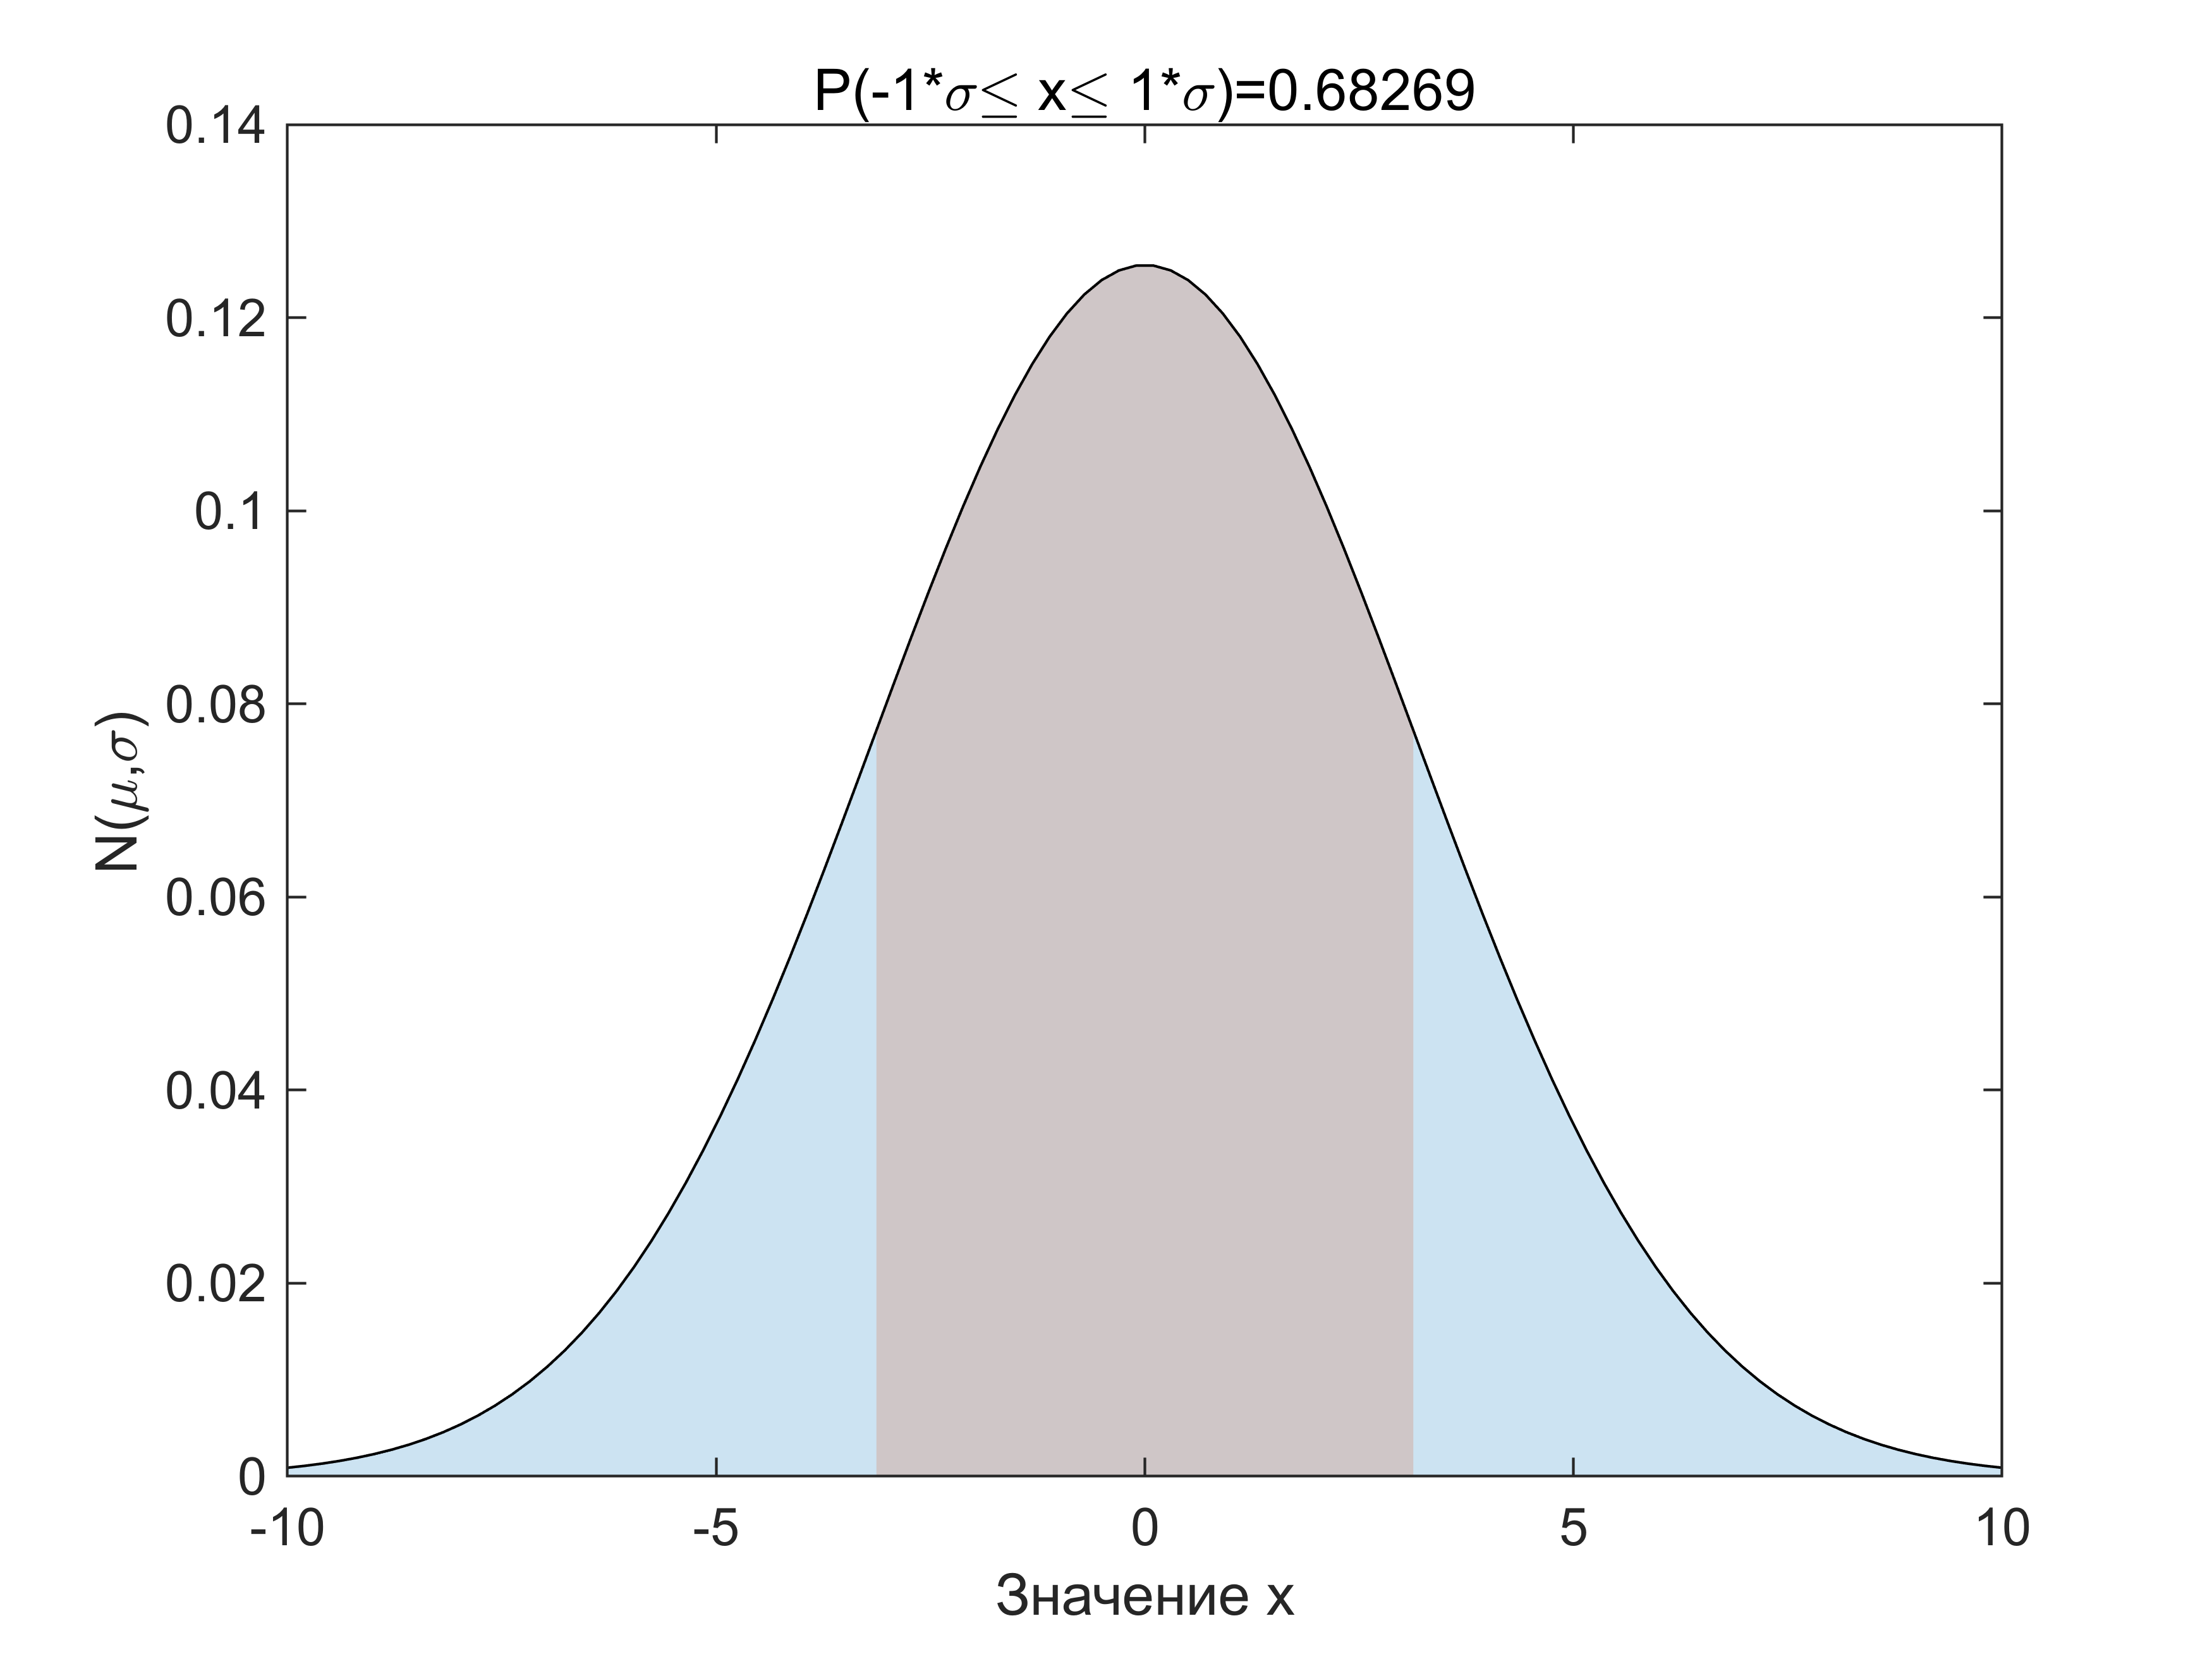

In [31]:
clearvars
x = linspace(-10,10,100)';
sig = 3.18;
distr_fun = norm_distribution_function(0,sig);
sigma_multiplier=1;
P = integral(distr_fun,-sigma_multiplier*sig,sigma_multiplier*sig);
% integral - функция численного интегрирования
ax = get_next_ax();
area(ax,x,distr_fun(x),"FaceAlpha",0.2)
hold(ax,"on");
sub_x = x((x>=-sigma_multiplier*sig)&(x<=sigma_multiplier*sig));
area(sub_x,distr_fun(sub_x),"FaceAlpha",0.2);
title(ax,"P(-"+string(sigma_multiplier) + "*\sigma"+ "\leq x\leq "+string(sigma_multiplier) + "*\sigma)="+ string(P))
ylabel(ax," N(\mu,\sigma)")
xlabel(ax,"Значение x")
hold(ax,"off");


$erf(x)=\frac{2}{\sqrt{\pi }}\int_0^x e^{-t^2 } dt$ \- интеграл от гауссиана \- специальная функция


$$P(x|t<x)=\frac{1}{2}[1-erf(-\frac{x}{\sqrt{2}})]$$

In [32]:
% это соотвенственнно точное значение
tb = table(P,erf(sigma_multiplier/sqrt(2)));
tb.Properties.VariableNames = ["Численное интегрирование" "Точное значение"];
tb

In [33]:
clearvars
% строим нормальное распределение
sig = 1;
mu = 0;
distr_fun = norm_distribution_function(mu,sig);
sigma_multiplier = 0.5:0.5:3;
P = zeros(numel(sigma_multiplier),1);
tic
%parfor ii = 1:numel(sigma_multiplier)
for ii = 1:numel(sigma_multiplier)
    m = sigma_multiplier(ii);
    % интегрируем численно от mu-m*sig до mu + m*sig
    P(ii) = integral(distr_fun,mu-m*sig,mu+m*sig);
end
toc

Elapsed time is 0.035474 seconds.


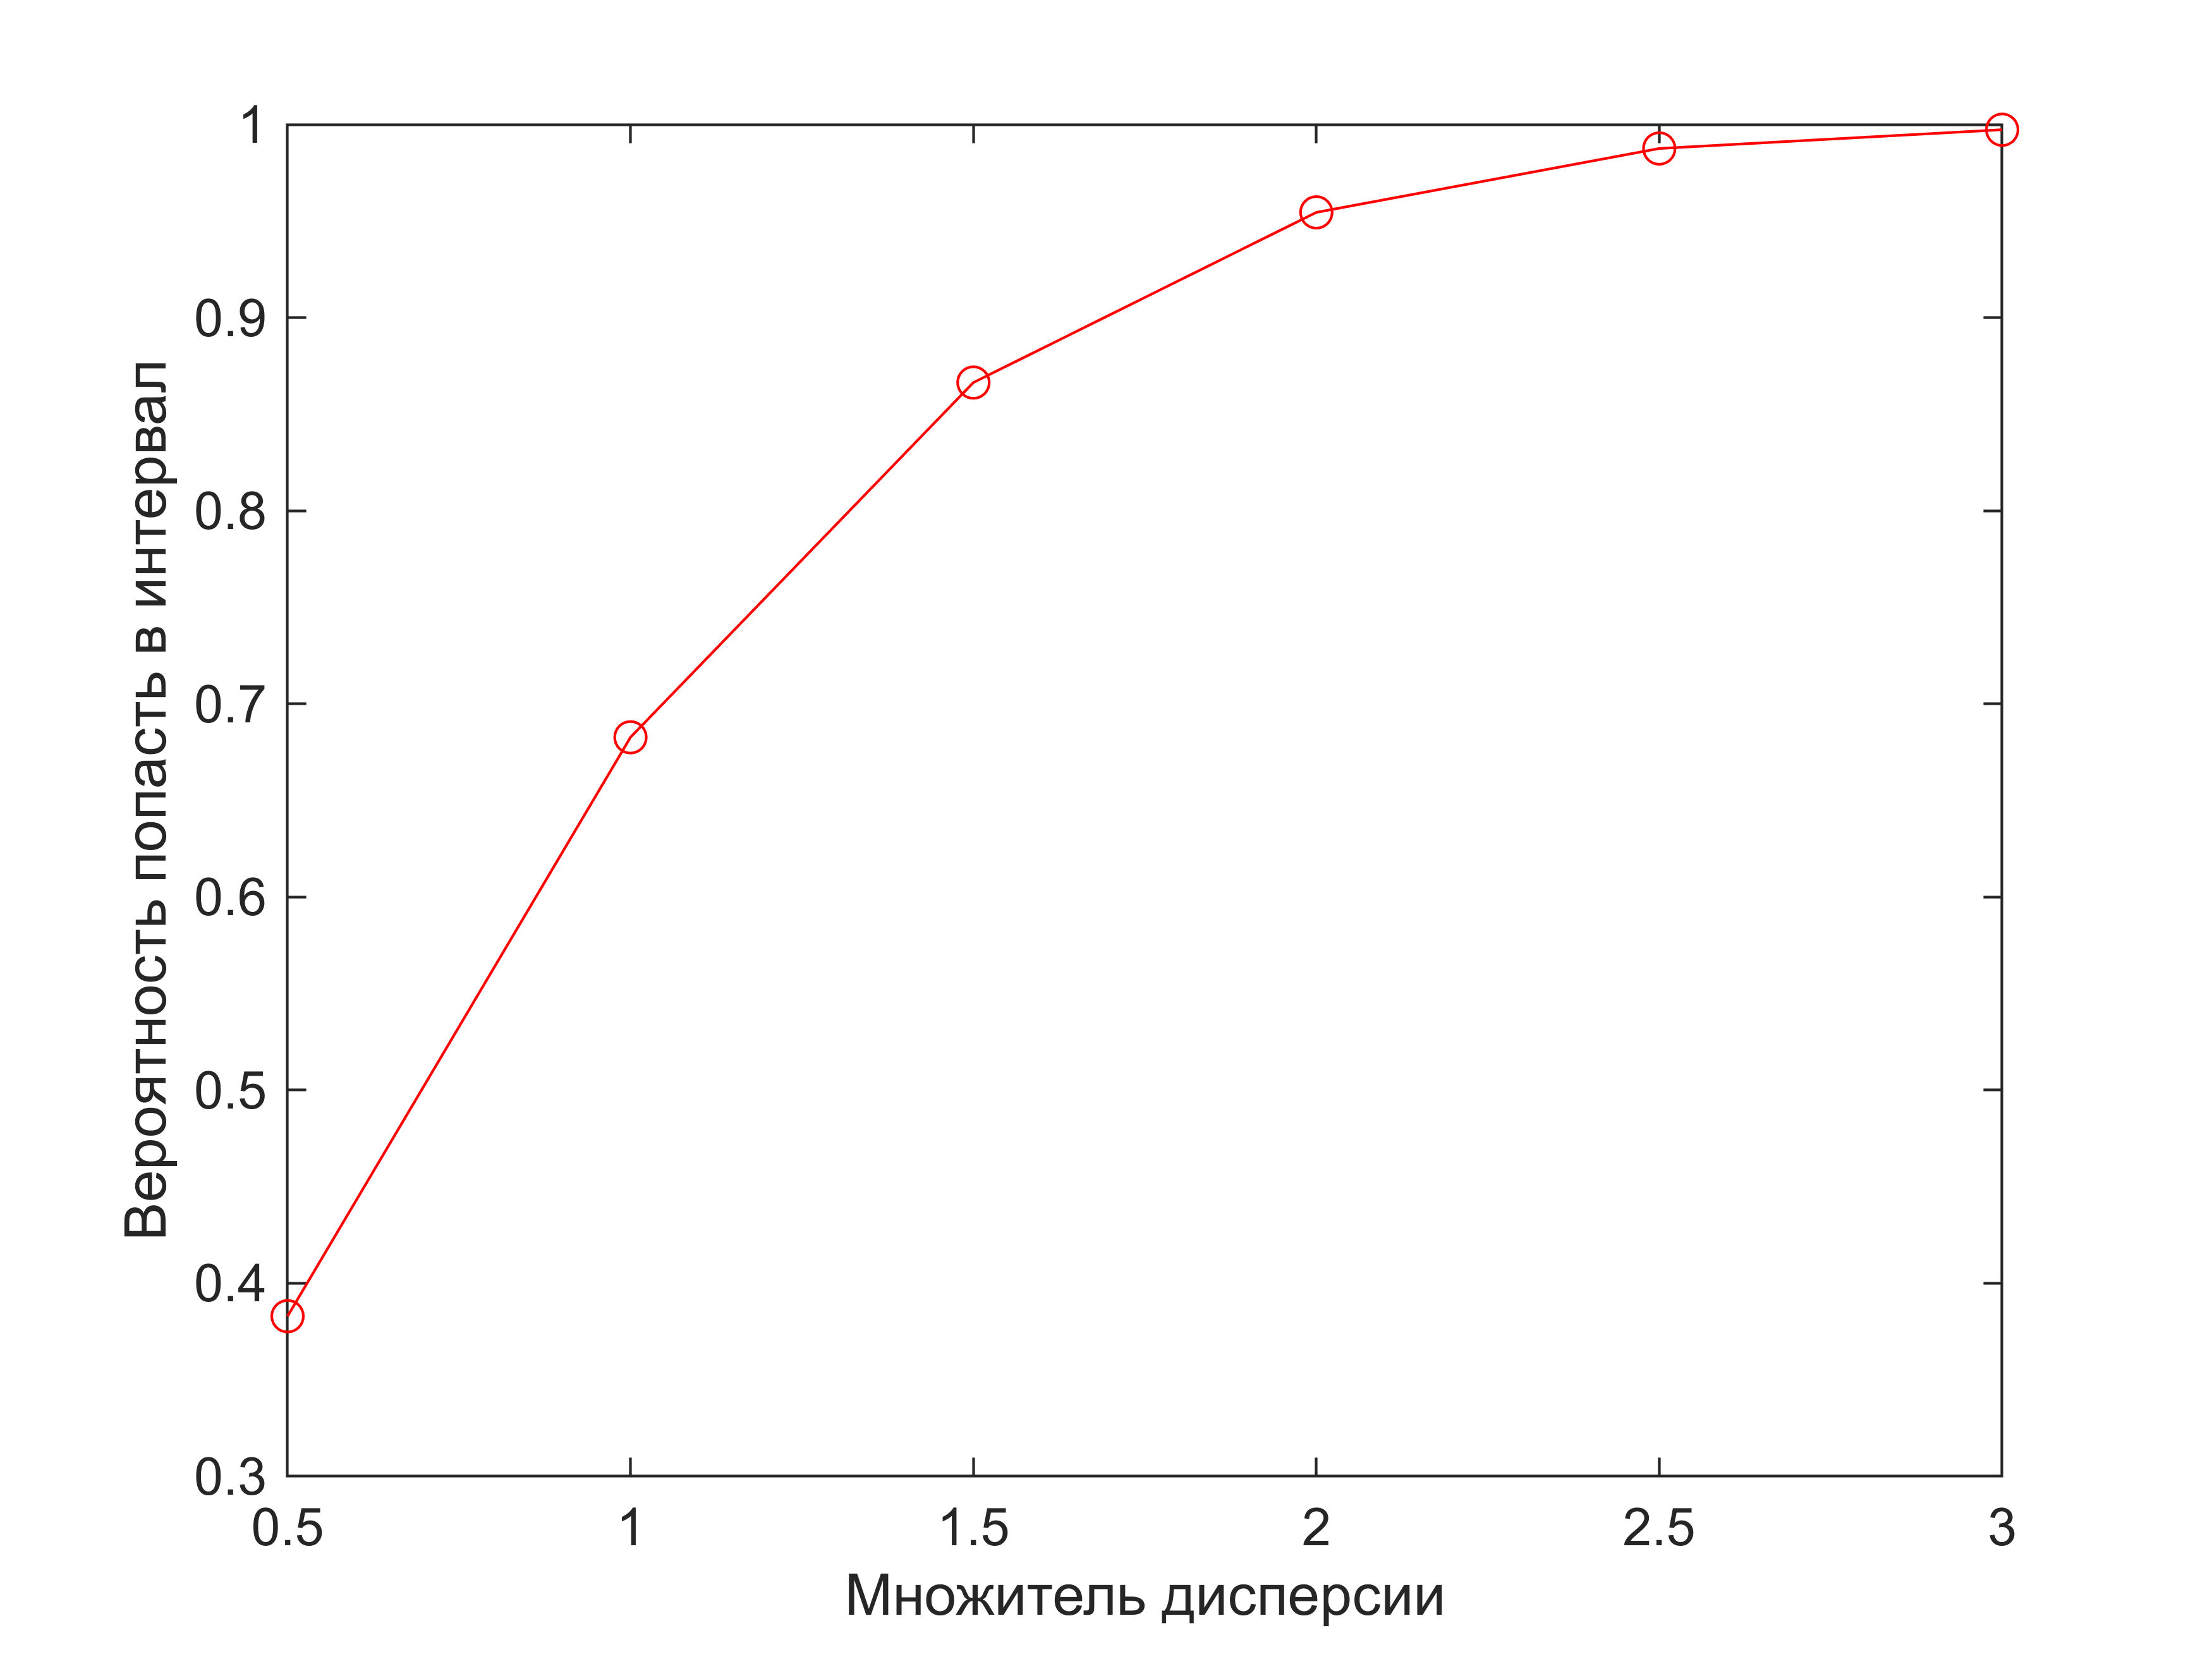

In [34]:
ax = get_next_ax();

plot(ax,sigma_multiplier,P,"or-");
xlabel(ax,"Множитель дисперсии");
ylabel(ax,"Вероятность попасть в интервал")

In [35]:
table(sigma_multiplier(:),P,VariableNames = ["Множитель","Вероятность"])


$\mathcal{N}(0,1)$ \- стандартное нормальное распределение (функция randn)


Чтобы получить переменную, взятую из $\zeta \sim \mathcal{N}(\mu ,\sigma^2 )$ из переменной, взятой из стандартного распределения $\eta \sim \mathcal{N}(0,1)$


$$\zeta \sim \mathcal{N}(\mu ,\sigma^2 )=\mu +\sigma^2 \mathcal{N}(0,1)$$

Важное распределение \- хи квадрат. Хи\-квадрат распределение показывает распределение значений суммы квадратов нормальных случаных переменных:


$$\chi_k^2 =\sum_{i=1}^k Z_i^2$$

где $Z_i \sim \mathcal{N}(0,1)$


Важное распределение  \- распределение Вейбулла (прочность хрупких материалов подчиняется статистике Вейбулла)


 $p_{weib} (x|;a,b)=\frac{b}{a}(\frac{x}{a})^{b-a} e^{(-x/a)^b }$ для $x\ge 0$


In [36]:
%в statistics and machine learning toolbox есть функция fitdist,
% которая позволяет подбирать распределение под данные
data =  load(fullfile(get_folder(),"DataWeibDistr.mat"));
X = data.MAT;
scatter(get_next_ax(),1:numel(X),X)

In [37]:
fitdist(X,"Weibull")

ans = 
  WeibullDistribution
  Weibull distribution
    A = 249.174   [244.015, 254.443]
    B = 13.0011   [10.7242, 15.7614]

In [38]:
% distributionFitter - приложения для фитинга распрелений


<p style="text-align:left">
   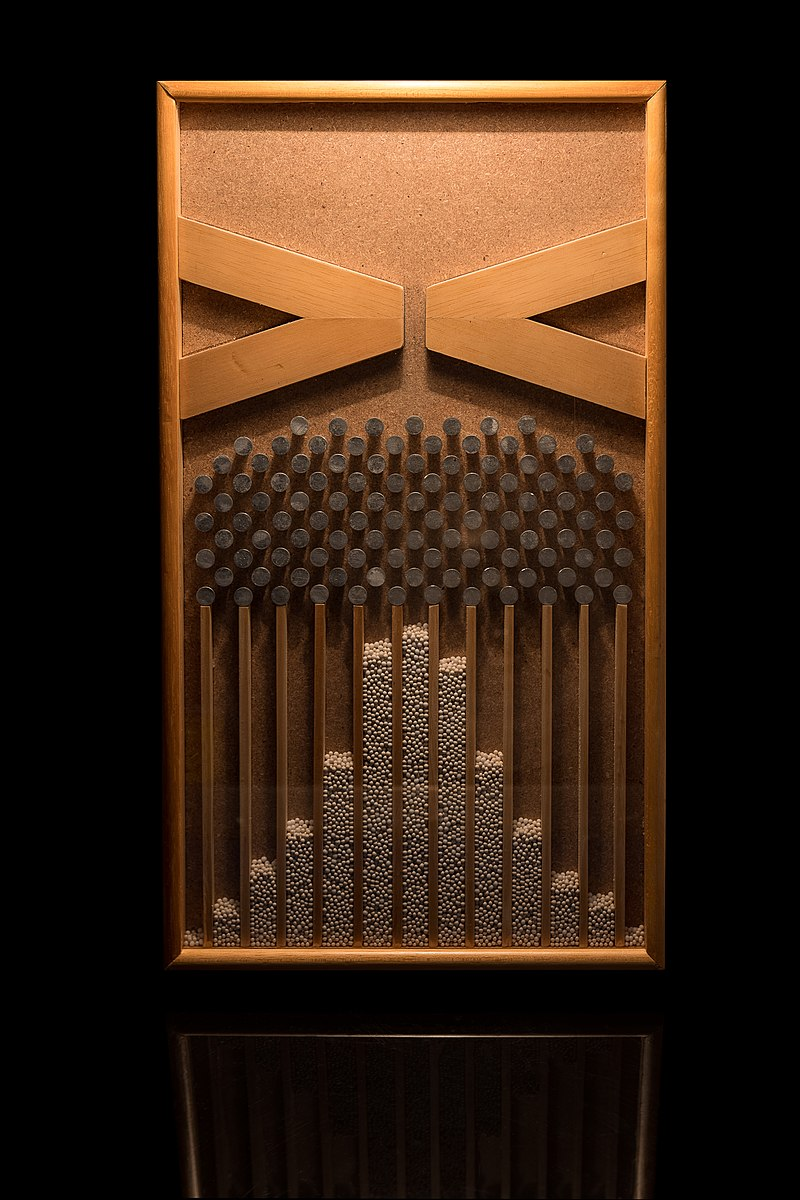
</p>


In [39]:
clearvars
% картинки разных распределений
% наша задача  - построить распределения на основе "экспериментальных" данных

M = 50; % число точек сетки
tmin=-5;tmax=286;t = transpose(linspace(tmin,tmax,M));
distrib = 'Normal'; % выбираем тип генератора случаных чисел
mu=122.37; % первый параметр распределения
sigma = 6.98; % второй параметр распределения
N = 1e4; % число экспериментов
pd = make_dist(distrib,mu=mu,sig=sigma); %генерит генератор случайных чисел
% для различных двухпараметрических распределений(обертка для встроенных генераторов, для всех кроме
% нормального и равномерного распределения нужен statistical toolbox
g = pd(N);% возращает вектор из N чисел, распределенных в соотвествии с данным распределением
distr = zeros(M-1,1);
for ii = 1:M-1
    distr(ii) = sum((g<t(ii+1))&(g>=t(ii)))/N; % считаем число точек, которые попали в интервал
end
sum_distr = sum(distr)

sum_distr = 0.9961

In [40]:
average_g = mean(g) % оценка среднего из среднего арифметического

average_g = 122.5214

In [41]:
var_g = (g - average_g)'*(g - average_g)/(N-1) % оценка вариации

var_g = 2.3164e+03

In [42]:
ax= get_next_ax();
histogram(ax,g,t)
title(ax,distrib)

In [43]:
tb = table();
tb.mu = mu;tb.mean = average_g;tb.sig = sigma^2;tb.std = sqrt(var_g);
tb






(картинка из книжки K.P.Murphy "Probabilistic machine learning. An introduction", иллюстрирующая недостаточность дескриптивной статистики, все эти наборы данных имеют одно среднее по каждому из столбцов, вариацию и коэффициент корреляции между x и y)

<p style="text-align:left">
   
</p>

### Выводы по семинару 8
1.  Рассмотрены два примера линейной регрессии, первый \- фиттинг данных поверхностью параболоида, второй  \- сведение нелинейной функции к линейной путем нелинейного преобразования
2. Основные характеристики случайной велчины $\psi$ математическое ожидание $\mathbb{E}[\psi ]$ и вариация $\mathbb{V}[\psi ]=\mathbb{E}[(\psi -\mathbb{E}[\psi ])^2 ]$ , для их оценки по выборке применяется среднее арифметическое и среднее квадратическое отклонение среднего
3. В качестве меры совместного изменеия двух случаных величин применяется ковариация $Cov(\nu ,\eta )=\mathbb{E}[(\nu -\mathbb{E}[\nu ])(\eta -\mathbb{E}[\eta ])]$
4. Для вектора случайных величин вводят матрицу вариации \- ковариации, в которой каждый элементы i\-й строки j\-го столбца соотвествует ковариации его i\-й и j\-й координаты
5. Если имеются измерения $X=[{\vec{X_1 } }^T ,\ldots,{\vec{X_i } }^T ,...,{\vec{X_N } }^T ]^T$ , в которой каждый столбец \- это вектор сэмплов N случайных величин. Каждая $i$ \- я строка матрицы $X$ \- это $M$ сэмплов случайной величины $x_i$ \- компоненты случайного вектора $\vec{x}$ .  Для экспериментальной оценки матрицы ковариации: $K_X =[X-\vec{\mu} {\vec{I_M } }^T ][X-\vec{\mu} {\vec{I_M } }^T ]^T /(M-1)$ ; $\vec{\mu}$ \- вектор\-столбец размером Nx1 средних значений каждой из строк $\vec{\mu} =\frac{X\vec{I_M } }{M}$ .
## ЛИТЕРАТУРА

1. N.Draper, H.Smith . Applied regression analysis. Third edition. Wiley Series in Probability and Statistics.


3. K.Murphy. Probabilistic machine learning. An Introduction. [Book](https://probml.github.io/pml-book/book1.html)


2.  Gilbert Strang \- Introduction to Linear Algebra (2016, Wellesley\-Cambridge Press)



In [44]:
function rus_name = rus(type)
    possible_types =  ["stand" "legA" "trig" "legP" "custom"];
    possible_rus_names = ["Стандартный базис" "Присоединенные полиномы Лежандра" "Тригонометрический базис" "Полиномы лежандра" "Кастомный"];
    flag = possible_types==type;
    if any(flag)
        rus_name = possible_rus_names(flag);
    else
        rus_name = type;
    end

end
function f = norm_distribution_function(mu,sig)
% возвращает анонимную функцию для нормального распределения
    f =@(x) exp(-(x-mu).^2./(2*sig^2))./(sig*sqrt(2*pi));
end
function [V,s] = vandermatrix(t,P,type,polyprod_function)
arguments
    t double
    P (1,1) double {mustBeInteger,mustBePositive} = 2
    type (1,1) string {mustBeMember(type,["stand" "legA" "trig" "legP" "custom"])} = "stand"
    polyprod_function =[]
end
% создаем матрицу Вандермонда
% type - тип полинома (стандартный базис, полиномы лежандра,
% тригонометрические полиномы)
    t = t(:);
    N = numel(t);
    V = zeros(N,P);
    if ~(type=="custom")
        [Pfun,s] = producing_function(type,t); % возвращаем производящую функцию для колонки матрицы вандермонда
    else
        assert(~isempty(polyprod_function)||~isa(polyprod_function,"function_handle"),"Если выбрана кастомная производящая функция, то нужно ее предоставить")
        s = normalize(t);
        Pfun = @(i)polyprod_function(i,s.x);
    end
    for jj = P:-1:1
        V(:,jj) = Pfun(jj);
    end
end
function dist= make_dist(type,options)
% возращает генератор N случайных чисел, распределенных в соответствии
% с двух параметрическими распределениями: нормальным, дельта-равномерным,
% Вейбулла и Хи-квадрат
    arguments
        type (1,1) string {mustBeMember(type,["Normal" "Uniform" "Weibull" "Chi2"])}
        options.mu (1,1) =0
        options.sig (1,1)=0
    end
    mu=options.mu;
    sig2=options.sig^2;
    switch type
        case "Normal"
            dist = @(N) mu + sig2*randn([N 1]);
        case "Uniform"
            dist  = @(N)   sqrt(sig2)*(rand([N 1])  -0.5)+ mu;
        case "Weibull"
            dist  = @(N) wblrnd(mu,sqrt(sig2),N,1);
        case "Chi2"
            dist = @(N) (mu + sig2*randn([N 1]).^2);
    end

end
function norm_struct = normalize2(t)
% функция возвращает стурктуру, в которой хранятся данные для нормировки
    if ~issorted(t)
        t = sort(t,"ascend");
    end
    tmin = t(1);
    tmax = t(end);
    x = 2.0*((t - tmin) / (tmax - tmin))- 1;
    norm_struct = struct("tmin",tmin,"tmax",tmax,"x",x); %t,(max(t) - min(t))
end
function t = denormalize2(s)
    t = 0.5*(s.x + 1.0)*(s.tmax - s.tmin) + s.tmin;
end
function Pn = leg_polyA(i,t) % производящая функция для присоединенных полиномов Лежандра
    persistent P
    persistent tleg
    leg_type = 'norm';
    if isempty(tleg)||isempty(P)||(~isequal(t,tleg))
        P = transpose(legendre(i-1,t,leg_type)); % встроенная функция по сути возвращает уже матрицу Вандермонда
        tleg = t;
    end
    if i<=size(P,2)
        Pn = P(:,i);
        return
    end
    P = transpose(legendre(i,t,leg_type));
    tleg = t;
    Pn = P(:,end);
end
function Pn = trig_poly(i,t) % производящая функция для тригонометрических полиномов
    if i==1
        Pn  = ones(size(t));
        return
    end
    if mod(i,2)==0
        Pn = cos(i*t*pi);
    else
        Pn = sin(i*t*pi);
    end
end
function [P,s] = producing_function(type,t)
% функция возвращает производящую функцию для полинома
    s = normalize2(t);
    switch type
        case "stand" % стандартный базис полинома
          P = @(i) s.x.^(i-1);
        case "legA" % присоединенные полиномы Лежандра
          P = @(i) leg_polyA(i,s.x);
        case "legP" % полиномы Лежандра
          P = @(i) legendreP(i-1,s.x) ; % стандартная фукнция для полиномов лежандра
        case "trig" % тригонометрический базис
          P = @(i) trig_poly(i,s.x);

    end

end
function [new_ax,fig_handle] = get_next_ax(index, axes_name_value_pairs)
% функция, которая возвращает новые оси на новой фигуре (нужна чтобы
% кратинки в ливскрипте нормально строились)
    arguments
        index = []
        axes_name_value_pairs cell = {}
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
        %disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
    end
end
function ax = get_named_ax(title_string)
    ax = get_next_ax();
    title(title_string);
end
function ax = draw_vector(ax,ttl,names,type,varargin)
% функция строит двух- и трех-мерные вектора, а также рассеянные данные из
% матрицы
% ax - оси (если пустые, то создаются новые)
% ttl - заголовок картинки
% names - имена векторов
% type:
%       "vector" - аргументы, которые передаются после интерпретируются
%                   как отдельные вектора
%       "point"  - в этом случае передается матрица в качестве аргумента и
%       столбцы матрицы строятся при помощи функций scatter и scatter3 d
%       в зависимости от размерности массива
    arguments
        ax =[]
        ttl string =strings(0,1)
        names string =strings(0,1)
        type string {mustBeMember(type,["vector" "point"])}="vector"
    end
    arguments (Repeating)
        varargin double
    end
    was_empty = isempty(ax); % это признак того, что все строится на новых осях
    if was_empty
        ax = get_next_ax();
    else
        hold(ax,"on");
        % if ~isempty(ax.Legend)
        %     leg_before = ax.Legend.String;
        % else
        %     leg_before = strings(0,1);
        % end
    end

    if strcmp(type,"vector")
        is_3D = numel(varargin{1})==3;
            if is_3D
                [x,y,z]  = make_xy(varargin{1});
                plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y,z] = make_xy(varargin{iii});
                        plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            else
                [x,y]  = make_xy(varargin{1});
                plot(ax,x,y,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y]  = make_xy(varargin{iii});
                        plot(ax,x,y,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            end
            if isempty(names)||(numel(names)~=numel(varargin))
                legend(ax,string(1:numel(varargin)));

            else
                % if ~was_empty
                %      names= [names(:);leg_before(:)];
                % end
                legend(ax,names);
            end
            xlim(ax,[-1 1]);
            ylim(ax,[-1 1]);
            if ~isempty(ttl)
                title(ax,ttl);
            end
    else
        %data_number = numel(varargin); % число массивов данных
        is_3D = numel(varargin)==3;
        data = varargin{1};
        if size(data,2)>1
            data = transpose(data);
            is_transpose = true;
        else
            is_transpose = false;
        end
        if ~is_transpose
            for iii = 2:numel(varargin)
                data = [data,varargin{iii}];
            end
        else
            for iii = 2:numel(varargin)
                data = [data,transpose(varargin{iii})];
            end
        end

        if is_3D
            scatter3(ax,data(:,1),data(:,2),data(:,3));
        else
            scatter(ax,data(:,1),data(:,2));
        end

    end
    if ~was_empty
            hold(ax,"off");
    end
end
function [x,y,z]  = make_xy(col)
% добавляет к координатам вектора нули так, чтобы при помощи функции plot
% строилась линия
    switch numel(col)
        case 1
            x = [col(1)];
            y = 0;
            z = 0;
        case 2
            x = [0 col(1)];
            y = [0 col(2)];
            z = zeros(1,2);
        case 3
            x = [0 col(1)];
            y = [0 col(2)];
            z = [0 col(3)];
    end
end
function folder = get_folder()
% текущая папка
folder = fileparts(matlab.desktop.editor.getActiveFilename);
end